# Code for plots and main analyses in: Ma, Westhoff, van Duijvenvoorde (BioRxiv)
 The paper can be found here: https://doi.org/10.1101/2020.05.19.105114
 


In [53]:
install.packages("ggcorrplot")
#load packages and data files
library(lme4)
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=8)
library(sjPlot)
library(RColorBrewer)
library(stargazer)
library("tidyr")

setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/analyses/")
sampledata <- read.csv('sampledata.csv')
sampledata$f_ageGroup <- as.factor(sampledata$ageGroup) # groups for data visualization
sampledata$open <- 25 - sampledata$closed
sampledata$f_recip <- as.factor(sampledata$recip)
sampleHist <- sampledata[!sampledata$rawChoice == 0,]

setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/data/vragenlijsten/")
BICdiff <- read.csv("BIC_models_Forrestplot_ORA.csv", header = TRUE)
Age_BICdiff <- read.csv("Age_BICDifference.csv", header = TRUE)
SumBIC <- read.csv("Summed_BIC_ORA.csv", header = TRUE)
Age_BICdiffUn <- read.csv("Age_BICDifference_Uncert.csv", header = TRUE)
df_selfreports <- read.csv("SL3_APQSEQ_IliJune2021.csv", header = TRUE)

setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/analyses/")
df_models <- read.csv('df_models.csv')

head(sampleHist)


The downloaded binary packages are in
	/var/folders/2k/3g461l495j1cp9ngptz1z6400000gp/T//RtmpgfdbMt/downloaded_packages


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'Summed_BIC_ORA.csv'”

,subject,gender,ageExact,age,trial,trialstart,trialtime,recip,rawChoice,green,red,closed,choice,diffgreen,ageGroup,f_ageGroup,open,f_recip
10,1,0,20.94,20,1,0.222462,90.88502,0.4,-1,4,5,16,-1,1,4,4,9,0.4
14,1,0,20.94,20,2,91.037060,96.41262,0.6,-1,0,3,22,-1,3,4,4,3,0.6
20,1,0,20.94,20,3,96.533799,105.41434,0.4,-1,1,4,20,-1,3,4,4,5,0.4
24,1,0,20.94,20,4,105.539476,111.67599,1.0,1,3,0,22,1,3,4,4,3,1
28,1,0,20.94,20,5,111.784499,115.01241,0.2,1,3,0,22,1,3,4,4,3,0.2
32,1,0,20.94,20,6,115.065458,118.12361,0.0,-1,0,3,22,-1,3,4,4,3,0


## 1.0 BEHAVIOR PLOTS
### Figure1b. Sample data

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”

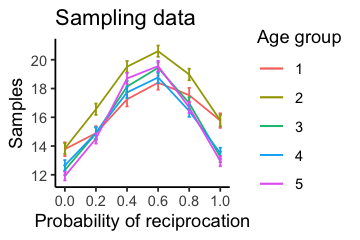

In [2]:
options(repr.plot.width=3, repr.plot.height=2)
p_1B <- ggplot(sampleHist, aes(x = recip, y = open, color = f_ageGroup)) + 
  stat_summary(fun.y=mean,
               geom="line") +
  stat_summary(fun.data=mean_se,
               geom="errorbar",
               width = 0.02) + 
  labs(title = "Sampling data", x = "Probability of reciprocation", y = "Samples", color = "Age group") +
  theme_classic() +
  scale_x_continuous(breaks=seq(0,1,0.2)) 
p_1B

## Figure1c. Invest data

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”

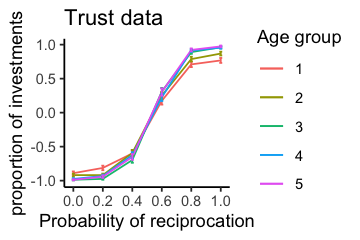

In [4]:
p <- ggplot(sampleHist, aes(x = recip, y = rawChoice, color = f_ageGroup)) + 
  stat_summary(fun.y=mean, geom="line") +
  stat_summary(fun.data=mean_se, geom="errorbar", width = 0.02) + 
  scale_fill_brewer(palette = "Paired") +
  labs(title = "Trust data", x = "Probability of reciprocation", y = "proportion of investments", color = "Age group") +
  theme_classic() +
  scale_x_continuous(breaks=seq(0,1,0.2))
p

## 2.0 ILLUSTRATIONS OF THE PRIOR BELIEF UPDATES
## Figure2a: Hypothetical prior distributions 

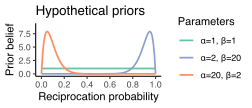

In [5]:
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

x <- seq(0, 1, .01)
q <- dbeta(x, 1, 1)
z <- dbeta(x, 2, 20)
w <- dbeta(x, 20, 2)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              labels=c("α=1, β=1", "α=2, β=20", "α=20, β=2"))
gg <- gg + labs(x="Reciprocation probability", y="Prior belief",
                title="Hypothetical priors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic() 
gg 

ggsave("prior.pdf", width = 3.5, height = 1.5)

## Figure2a: Hypothetical posterior distributions 

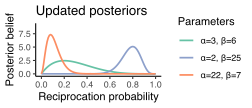

In [6]:
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

x <- seq(0, 1, .01)
q <- dbeta(x, 2, 5)
z <- dbeta(x, 3, 24)
w <- dbeta(x, 21, 6)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              labels=c("α=3, β=6", "α=2, β=25", "α=22, β=7"))
gg <- gg + labs(x="Reciprocation probability", y="Posterior belief",
                title="Updated posteriors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic() 
gg 
ggsave("posterior1.pdf", width = 3.5, height = 1.5)

## Figure2b: Corresponding posterior distributions to illustrate the effect of prior distributions on belief updates

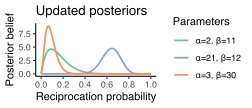

In [7]:
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

# green+1, red+10
x <- seq(0, 1, .01)
q <- dbeta(x, 2, 11)
z <- dbeta(x, 3, 30)
w <- dbeta(x, 21, 12)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              #values=c("#1b9e77", "#7570b3", "#d95f02"),
                              labels=c("α=2, β=11", "α=21, β=12", "α=3, β=30"))
gg <- gg + labs(x="Reciprocation probability", y="Posterior belief",
                title="Updated posteriors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic()

gg

ggsave("posterior2.pdf", width = 3.5, height = 1.5)

## 3.0 DESCRIPTIVE STATISTICS
### Mixed-effects models of sampling 

In [3]:
# center and scale data for sampling regressions
sampledata$diffgreen <- abs(sampledata$green - sampledata$red)
sampledata$s_diffgreen <- scale(sampledata$diffgreen, center = TRUE, scale = TRUE)
sampledata$s_ageExact <- scale(sampledata$ageExact, center = TRUE, scale = TRUE)

sampledata$choice = sampledata$rawChoice
sampledata$choice[sampledata$choice==-1] <- 1

#Descriptive statistics: the consistency of sample outcomes affected the probability of sampling
lin_diffgreenmodel <- glmer(choice ~ s_diffgreen * s_ageExact + (1| subject), data = sampledata, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
quad_diffgreenmodel <- glmer(choice ~ s_diffgreen * poly(s_ageExact, degree = 2, raw = TRUE) + (1| subject), data = sampledata, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa"))) 
log_diffgreenmodel <- glmer(choice ~ s_diffgreen * scale(log(ageExact)) + (1| subject), data = sampledata, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa"))) 

anova(lin_diffgreenmodel, quad_diffgreenmodel, log_diffgreenmodel)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lin_diffgreenmodel,5,65388.28,65438.26,-32689.14,65378.28,NA,NA,NA
quad_diffgreenmodel,7,65380.57,65450.55,-32683.29,65366.57,11.70889,2,0.002867132



Mixed effects model sampling decisions
                                  Dependent variable:    
                              ---------------------------
                                        choice           
---------------------------------------------------------
|green-red|                            0.834***          
                                       p = 0.000         
Age (linear)                             0.041           
                                       p = 0.511         
Age (quadratic)                          0.079           
                                       p = 0.256         
|green-red| * age (linear)             0.175***          
                                       p = 0.000         
|green-red| * age (quadratic)          -0.039***         
                                       p = 0.001         
intercept                              -2.964***         
                                       p = 0.000         
--------------------------------

In [8]:
tab_model(log_diffgreenmodel)
summary(log_diffgreenmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choice ~ s_diffgreen * scale(log(ageExact)) + (1 | subject)
   Data: sampledata
Control: glmerControl(optCtrl = list(maxfun = 1e+09), optimizer = c("bobyqa"))

     AIC      BIC   logLik deviance df.resid 
 65379.1  65429.1 -32684.5  65369.1   162140 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3020 -0.2669 -0.1920 -0.1440 14.6560 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.5964   0.7723  
Number of obs: 162145, groups:  subject, 157

Fixed effects:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -2.88238    0.06271 -45.963   <2e-16 ***
s_diffgreen                       0.79510    0.01056  75.310   <2e-16 ***
scale(log(ageExact))              0.03675    0.06204   0.592    0.554    
s_diffgreen:scale(log(ageExact))  0.17820    0.01005  17.738  

### Mixed effects models of investing

In [16]:
# center and scale for invest regression
sampleHist$rawChoice[sampleHist$rawChoice<0] <- 0
sampleHist$s_ageExact <- scale(sampleHist$ageExact, center = TRUE, scale = TRUE)

# Descriptive statistics: invest decisions were predicted by the reciprocation probability
modelinv_lin <- glmer(rawChoice ~ scale(recip) * s_ageExact + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
modelinv_quad <- glmer(rawChoice ~ scale(recip) * poly(s_ageExact, degree = 2, raw = TRUE) + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
modelinv_log <- glmer(rawChoice ~ scale(recip) * scale(log(ageExact)) + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))

#modelinv_log_gen <- glmer(rawChoice ~ f_recip * scale(log(ageExact)) + f_recip * s_ageExact + gender + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
tab_model(modelinv_log)
summary(modelinv_log)

In [24]:
anova(modelinv_lin, modelinv_quad, modelinv_log)
tab_model(modelinv_log)
summary(modelinv_log)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
modelinv_lin,5,5574.199,5609.952,-2782.099,5564.199,NA,NA,NA
modelinv_log,5,5563.727,5599.480,-2776.863,5553.727,10.47182,0,NA
modelinv_quad,7,5560.027,5610.081,-2773.013,5546.027,7.70018,2,0.02127782


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rawChoice ~ scale(recip) * scale(log(ageExact)) + (1 | subject)
   Data: sampleHist
Control: glmerControl(optCtrl = list(maxfun = 1e+09), optimizer = c("bobyqa"))

     AIC      BIC   logLik deviance df.resid 
  5563.7   5599.5  -2776.9   5553.7     9415 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-26.780  -0.255  -0.037   0.248  41.909 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.7254   0.8517  
Number of obs: 9420, groups:  subject, 157

Fixed effects:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -0.47869    0.07749  -6.177 6.53e-10 ***
scale(recip)                       3.41435    0.07590  44.984  < 2e-16 ***
scale(log(ageExact))              -0.01064    0.07675  -0.139     0.89    
scale(recip):scale(log(ageExact))  0.83166    0.06240  1

## 4.0 MODEL COMPARISONS
### Figure 3A. Model comparisons

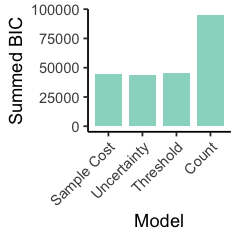

In [259]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/SummedBIC.pdf", width = 2, height = 2)
options(repr.plot.width=2, repr.plot.height=2)
SumBIC$Model <- factor(SumBIC$Model,levels = c("Sample Cost", "Uncertainty", "Threshold", "Count"))
model_barplots <-ggplot(SumBIC, aes(x=Model, y=Summed.BIC, width = 0.8)) +
  geom_bar(stat="identity", fill = "#99d8c9") +
  ylab('Summed BIC') +
  theme(plot.title=element_text(size=10,face="bold"),
        axis.text.x=element_text(angle = 45, hjust = 1),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
       legend.position = "none")
model_barplots
#dev.off()

## Figure 3B. model comparisons

Warning message:
“geom_hline(): Ignoring `mapping` because `yintercept` was provided.”

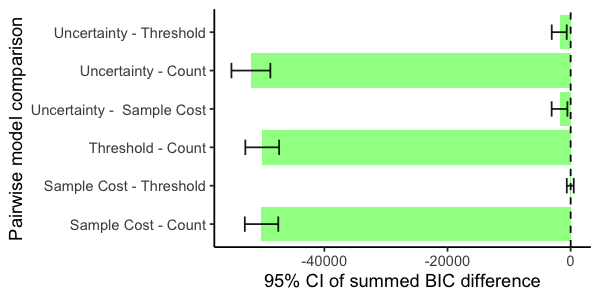

In [229]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/ModelComparisons.pdf", width = 5, height = 2.3)
options(repr.plot.width=5, repr.plot.height=2.5)
ggplot(BICdiff) +
    geom_bar( aes(x=Comparison, y=Summed.difference), stat="identity", fill="green", alpha=0.5) +
    geom_errorbar( aes(x=Comparison	, ymin=Lowerbound, ymax=Upperbound), width=0.4, colour="black", alpha=0.9, size=0.5) + 
    xlab('Pairwise model comparison')+ ylab("95% CI of summed BIC difference")+
    geom_hline(aes(fill=Comparison),yintercept =1, linetype=2)+
    coord_flip() +
    theme_classic()
#dev.off()

### BIC difference correlation with age  not in paper because uncertainty model fits best even when there is a correlation

`geom_smooth()` using formula 'y ~ x'


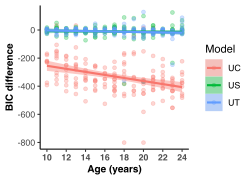

In [15]:
options(repr.plot.width=3.5, repr.plot.height=2.5)
P <- ggplot(Age_BICdiffUn, aes(x=Age, y=Difference, color=Model)) + 
  geom_point(alpha = 0.3)+
  xlab("Age (years)") +
  ylab("BIC difference") +
  geom_smooth(method=lm, aes(fill=Model)) +
  theme(plot.title=element_text(size=10,face="bold"),
        axis.text.x=element_text(face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.title=element_text(size=10,face="bold"))+
        scale_x_continuous(breaks=seq(10,24,2)) 
P

## 5.0 RELATION BETWEEN AGE AND MODEL DERIVED METRICS
### Regression uncertainty model prior mean estimates with age

In [30]:
lin_priormean_model <- lm(meanprior ~ s_ageExact, data = df_models)
quad_priormean_model <- lm(meanprior ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_priormean_model <- lm(meanprior ~ scale(log(ageExact)), data = df_models)

anova(lin_priormean_model, quad_priormean_model, log_priormean_model)

summary(lin_priormean_model) 
tab_model(lin_priormean_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,3.631000,NA,NA,NA,NA
154,3.595179,1,0.03582126,1.534409,0.2173367
155,3.620455,-1,-0.02527638,1.082717,0.2997213



Call:
lm(formula = meanprior ~ s_ageExact, data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41769 -0.08167  0.01150  0.05844  0.58679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.45048    0.01222  36.879   <2e-16 ***
s_ageExact   0.02263    0.01225   1.847   0.0667 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1531 on 155 degrees of freedom
Multiple R-squared:  0.02153,	Adjusted R-squared:  0.01521 
F-statistic:  3.41 on 1 and 155 DF,  p-value: 0.0667


### Regression uncertainty model prior uncertainty estimates with age

In [33]:
lin_priorSD_model <- lm(logpriorSD ~ s_ageExact, data = df_models)
quad_priorSD_model <- lm(logpriorSD ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_priorSD_model <- lm(logpriorSD ~ scale(log(ageExact)), data = df_models)

anova(lin_priorSD_model, quad_priorSD_model, log_priorSD_model)
summary(quad_priorSD_model) 
tab_model(quad_priorSD_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,524.0169,NA,NA,NA,NA
154,501.7480,1,22.26897,6.834947,0.009826869
155,516.8678,-1,-15.11987,4.640696,0.032777490



Call:
lm(formula = logpriorSD ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5710  -0.0047   0.4111   0.7009   2.1049 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                -1.8131     0.2186  -8.293 5.14e-14
poly(s_ageExact, degree = 2, raw = TRUE)1   0.4948     0.1445   3.423 0.000792
poly(s_ageExact, degree = 2, raw = TRUE)2  -0.4327     0.1655  -2.614 0.009827
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1 ***
poly(s_ageExact, degree = 2, raw = TRUE)2 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.805 on 154 degrees of freedom
Multiple R-squared:  0.1066,	Adjusted R-squared:  0.095 
F-statistic: 9.188 on 2 and 154 DF,  p-value: 0.00017


### Regression uncertainty model uncertainty tolerance criterion estimates with age

In [44]:
lin_criterion_model <- lm(logcriterion ~ s_ageExact, data = df_models)
quad_criterion_model <- lm(logcriterion ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_criterion_model <- lm(logcriterion ~ scale(log(ageExact)), data = df_models)


anova(lin_criterion_model, quad_criterion_model, log_criterion_model)
tab_model(lin_criterion_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,4091.782,NA,NA,NA,NA
154,4040.982,1,50.79923,1.9359357,0.1661172
155,4058.132,-1,-17.14914,0.6535457,0.4200949


### Regression uncertainty model prior uncertainty estimates with age

In [46]:
lin_softmax_model <- lm(log(softmax) ~ s_ageExact, data = df_models)
quad_softmax_model <- lm(log(softmax) ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_softmax_model <- lm(log(softmax) ~ scale(log(ageExact)), data = df_models)

anova(lin_softmax_model, quad_softmax_model, log_softmax_model) 

tab_model(quad_softmax_model)
summary(quad_softmax_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,1108.642,NA,NA,NA,NA
154,1091.246,1,17.39511,2.454851,0.1192148
155,1106.796,-1,-15.54988,2.194447,0.1405521



Call:
lm(formula = log(softmax) ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8185 -1.2977 -0.7736  0.0052 10.7265 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 4.8159     0.3224  14.936   <2e-16
poly(s_ageExact, degree = 2, raw = TRUE)1  -0.1160     0.2131  -0.544    0.587
poly(s_ageExact, degree = 2, raw = TRUE)2   0.3824     0.2441   1.567    0.119
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1    
poly(s_ageExact, degree = 2, raw = TRUE)2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.662 on 154 degrees of freedom
Multiple R-squared:  0.01744,	Adjusted R-squared:  0.004683 
F-statistic: 1.367 on 2 and 154 DF,  p-value: 0.2579


## 6.0 PLOTS RELATION BETWEEN AGE AND MODEL DERIVED METRICS
### Figure 4a: Pior mean as function of age

`geom_smooth()` using formula 'y ~ x'


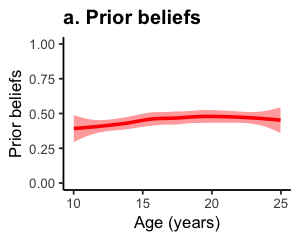

In [226]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/PriorBeliefs.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
priormean_age <- ggplot(df_models, aes(x= ageExact, y= meanprior)) +
  geom_smooth(method=loess, se=TRUE, color="red", fill="red") +
  ggtitle("a. Prior beliefs") +
  xlab("Age (years)") +
  ylab("Prior beliefs") +
  ylim(0,1) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
priormean_age
#dev.off()

### Figure 4b: Pior uncertainty as function of age

`geom_smooth()` using formula 'y ~ x'


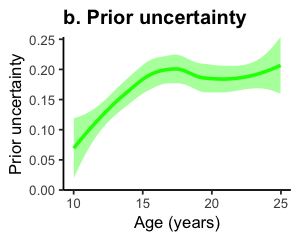

In [236]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/PriorUncertainty.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
priorUnc_age <- ggplot(df_models, aes(x=ageExact, y= priorSD)) + 
  geom_smooth(method=loess, se=TRUE, color="green", fill=" green") +
  ggtitle("b. Prior uncertainty") +
  xlab("Age (years)") +
  ylab('Prior uncertainty') +
  scale_y_continuous(expand = c(0, 0), limits = c(0, NA)) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
priorUnc_age
#dev.off()

Figure 4c: uncertainty tolerance criterion as function of age

### Figure 4c: uncertainty tolerance criterion as function of age

`geom_smooth()` using formula 'y ~ x'


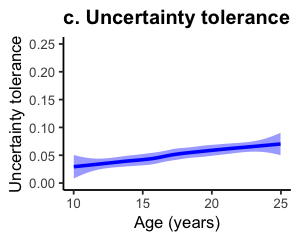

In [237]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/UncertaintyTol.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
criterion_age <- ggplot(df_models, aes(x=ageExact, y= criterion)) +
  geom_smooth(method=loess, se=TRUE, color="blue", fill="blue") +
  ggtitle("c. Uncertainty tolerance") +
  xlab("Age (years)") +
  ylab("Uncertainty tolerance") +  
  ylim(0, 0.25) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
criterion_age
#dev.off()

## 7.0 CORRLEATIONS BETWEEN MODEL DERIVED METRICS AND QUESTIONNAIRES

In [102]:
df_selfreports$Subject <- df_selfreports$SUBJECT

reqdf <- as.vector(c("meanprior","priorSD","criterion", "Subject")) # Storing the columns I want to extract as a vector
result <- df_models[,reqdf]       # Extracting only four columns

total <- merge(df_selfreports,result,by="Subject")
total$ID<-gsub("SLP3-","",as.character(total$Subject))
total<- na.omit(total)
total = subset(total, select = -c(Subject,SUBJECT, ID) )

head(total)

APQ_ChildPosParenting,APW_ChildPoorMonitoring,APQ_ChildInconsistentDisc,APQ_Child_InvolvMother,APQ_ChildInvolvFather,SEQ_ProsocialBeh,SEQ_AcceptingProsocialBeh,SEQ_PhysicalAgress,SEQ_RelationalAgress,SEQ_PhysicalVitimization,SEQ_RelationalVictimization,meanprior,priorSD,criterion
17,28,6,22,23,4.14,3.43,1.33,1.6,1.33,1.2,0.5000000,0.2886751,0.1223500
19,30,15,25,12,3.43,3.43,1.33,1.6,1.00,1.2,0.3756470,0.1976461,0.0901150
19,25,16,34,31,3.86,3.71,2.00,2.4,1.67,2.4,0.5080777,0.2740696,0.1036800
21,29,18,34,37,2.86,3.71,1.50,1.0,1.33,1.2,0.5517919,0.1354863,0.0801770
25,14,10,44,14,3.86,2.71,1.00,1.4,1.00,1.0,0.4893254,0.0050209,0.0046124
14,22,18,34,30,3.86,3.00,1.00,1.2,1.17,1.0,0.4565487,0.2758767,0.0961730


### Correlation matrix plot 
#### Correlation between APW_child poor monitoring seems to correlate with prior uncertainty and uncertainty tolerance

,APQ_ChildPosParenting,APW_ChildPoorMonitoring,APQ_ChildInconsistentDisc,APQ_Child_InvolvMother,APQ_ChildInvolvFather,SEQ_ProsocialBeh,SEQ_AcceptingProsocialBeh,SEQ_PhysicalAgress,SEQ_RelationalAgress,SEQ_PhysicalVitimization,SEQ_RelationalVictimization,meanprior,priorSD,criterion
APQ_ChildPosParenting,1.0,-0.2,0.0,0.5,0.5,0.3,0.4,-0.1,-0.1,-0.1,-0.1,-0.2,-0.1,-0.1
APW_ChildPoorMonitoring,-0.2,1.0,0.3,-0.4,-0.3,-0.2,0.0,0.3,0.1,0.0,-0.1,0.1,0.3,0.2
APQ_ChildInconsistentDisc,0.0,0.3,1.0,-0.1,0.0,-0.2,0.0,0.3,0.2,0.2,0.2,-0.1,0.0,0.0
APQ_Child_InvolvMother,0.5,-0.4,-0.1,1.0,0.6,0.4,0.3,-0.1,-0.1,0.0,-0.1,-0.1,-0.1,-0.1
APQ_ChildInvolvFather,0.5,-0.3,0.0,0.6,1.0,0.3,0.3,-0.1,-0.1,0.0,-0.1,-0.1,0.0,-0.1
SEQ_ProsocialBeh,0.3,-0.2,-0.2,0.4,0.3,1.0,0.5,-0.3,-0.2,-0.2,-0.1,0.0,0.0,0.0
SEQ_AcceptingProsocialBeh,0.4,0.0,0.0,0.3,0.3,0.5,1.0,-0.1,-0.2,-0.1,-0.2,0.0,0.1,0.1
SEQ_PhysicalAgress,-0.1,0.3,0.3,-0.1,-0.1,-0.3,-0.1,1.0,0.5,0.6,0.3,0.0,0.0,-0.2
SEQ_RelationalAgress,-0.1,0.1,0.2,-0.1,-0.1,-0.2,-0.2,0.5,1.0,0.5,0.6,0.0,-0.2,-0.2
SEQ_PhysicalVitimization,-0.1,0.0,0.2,0.0,0.0,-0.2,-0.1,0.6,0.5,1.0,0.6,0.1,-0.1,-0.3


,APQ_ChildPosParenting,APW_ChildPoorMonitoring,APQ_ChildInconsistentDisc,APQ_Child_InvolvMother,APQ_ChildInvolvFather,SEQ_ProsocialBeh,SEQ_AcceptingProsocialBeh,SEQ_PhysicalAgress,SEQ_RelationalAgress,SEQ_PhysicalVitimization,SEQ_RelationalVictimization,meanprior,priorSD,criterion
APQ_ChildPosParenting,0.0000000000,0.0138642671,0.24515274,2.155216e-04,2.092981e-04,0.0115458540,0.0080351785,0.0648053200,1.062033e-01,1.474661e-01,2.115490e-01,0.07168235,0.35362836,0.487835469
APW_ChildPoorMonitoring,0.0138642671,0.0000000000,0.09570877,3.450137e-04,2.321617e-03,0.0271730275,0.2061729920,0.1619925412,6.363240e-01,9.410515e-01,7.881855e-01,0.49107771,0.09646412,0.226665156
APQ_ChildInconsistentDisc,0.2451527416,0.0957087675,0.00000000,9.352916e-02,1.872519e-01,0.0196115550,0.1324282207,0.0414600497,1.288525e-01,1.798323e-01,1.955628e-01,0.41934734,0.63503271,0.554606323
APQ_Child_InvolvMother,0.0002155216,0.0003450137,0.09352916,0.000000e+00,1.085093e-05,0.0044082394,0.0266262039,0.0614384306,1.291479e-01,2.712496e-01,2.881408e-01,0.19433095,0.30128473,0.410514514
APQ_ChildInvolvFather,0.0002092981,0.0023216166,0.18725194,1.085093e-05,0.000000e+00,0.0142426527,0.0298783964,0.0637471538,1.069801e-01,2.400810e-01,2.331990e-01,0.16374215,0.46466913,0.449331323
SEQ_ProsocialBeh,0.0115458540,0.0271730275,0.01961155,4.408239e-03,1.424265e-02,0.0000000000,0.0005659419,0.0016381884,1.519044e-02,2.402176e-02,8.565873e-02,0.55384941,0.83735163,0.909887882
SEQ_AcceptingProsocialBeh,0.0080351785,0.2061729920,0.13242822,2.662620e-02,2.987840e-02,0.0005659419,0.0000000000,0.0125671664,5.322999e-03,1.828576e-02,1.807858e-02,0.45247104,0.77526042,0.611135808
SEQ_PhysicalAgress,0.0648053200,0.1619925412,0.04146005,6.143843e-02,6.374715e-02,0.0016381884,0.0125671664,0.0000000000,5.094675e-04,1.650945e-04,1.048886e-02,0.89010697,0.37180076,0.085749406
SEQ_RelationalAgress,0.1062032602,0.6363239950,0.12885252,1.291479e-01,1.069801e-01,0.0151904372,0.0053229990,0.0005094675,0.000000e+00,1.345980e-04,2.115932e-05,0.85453096,0.05753172,0.035061867
SEQ_PhysicalVitimization,0.1474660956,0.9410515300,0.17983232,2.712496e-01,2.400810e-01,0.0240217563,0.0182857554,0.0001650945,1.345980e-04,0.000000e+00,3.942867e-05,0.96382251,0.07811947,0.008738859


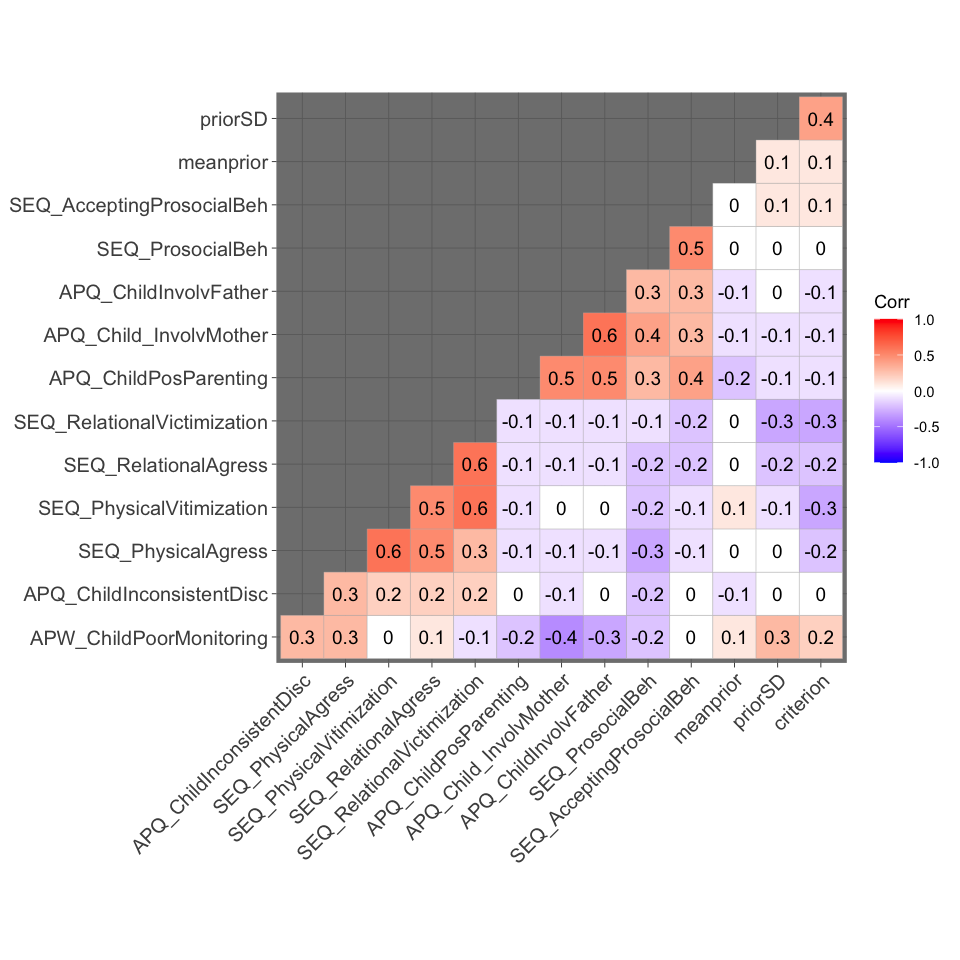

In [91]:
library(ggcorrplot)
options(repr.plot.width=8, repr.plot.height=8)
corr <- round(cor(total), 1)
corr
p.mat <- cor_pmat(corr)
p.mat

ggcorrplot(corr,
  hc.order = TRUE, type = "lower",
  lab = TRUE,
  ggtheme = ggplot2::theme_dark(),
)

### Some quick plots to explore the relation further

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


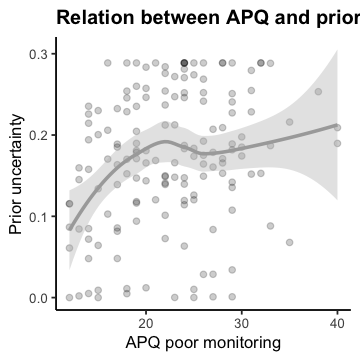

In [247]:
options(repr.plot.width=3, repr.plot.height=3)
  Uncert_monitoring <- ggplot(total, aes(x=APW_ChildPoorMonitoring, y=priorSD)) + 
  geom_point(color = "black", alpha = 0.2)+
  geom_smooth(color="darkgrey", fill="grey") +
  ggtitle("Relation between APQ and prior uncertainty") +
  xlab("APQ poor monitoring") +
  ylab("Prior uncertainty") +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
Uncert_monitoring


In [258]:
cor.test(total$priorSD, total$APW_ChildPoorMonitoring, method = "spearman")
cor.test(total$criterion, total$APW_ChildPoorMonitoring, method = "spearman")

Warning message in cor.test.default(total$priorSD, total$APW_ChildPoorMonitoring, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  total$priorSD and total$APW_ChildPoorMonitoring
S = 473210, p-value = 0.0015
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2520919 


Warning message in cor.test.default(total$criterion, total$APW_ChildPoorMonitoring, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  total$criterion and total$APW_ChildPoorMonitoring
S = 482380, p-value = 0.002821
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2375951 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


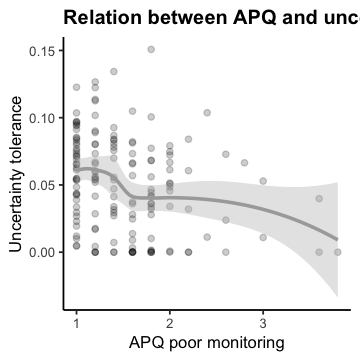

In [253]:
options(repr.plot.width=3, repr.plot.height=3)
Tol_mointoring <- ggplot(total, aes(x=SEQ_RelationalVictimization, y=criterion)) + 
  geom_point(color = "black", alpha = 0.2)+
  geom_smooth(color="darkgrey", fill="grey") +
  ggtitle("Relation between APQ and uncertainty tolerance") +
  xlab("APQ poor monitoring") +
  ylab("Uncertainty tolerance") +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold")) 
Tol_mointoring